In [21]:
import os 
import numpy as np
import pandas as pd


In [22]:
experiment_list = ["exp3", "exp2"]
experiment = experiment_list[1]
DIRECTORY = "../data/heuristic_elo_correlation_data/" + experiment
heuristics_data_path = DIRECTORY + "/Heuristics Elo Data"
heuristic_elo_correlation_path = os.path.join(DIRECTORY, "Correlation_Values.txt")

# with open(heuristic_elo_correlation_path, 'w') as f:
#     f.write("Heuristic, Correlation_Value \n")

# for file_name in os.listdir(heuristics_data_path):
#         # name = os.path.join(DIRECTORY, file_name)
#         print(file_name)

with open(heuristic_elo_correlation_path, 'w') as f:
    f.write("Heuristic, Correlation_Value \n")
    for file_name in os.listdir(heuristics_data_path):
        # name = os.path.join(DIRECTORY, file_name)
        FILEPATH = os.path.join(heuristics_data_path, file_name)
        # print(FILEPATH)
        
        df = pd.read_csv(FILEPATH)
    

        # df['Heuristic_Value'] = pd.to_numeric(df['Heuristic_Value'])
        # df['Elo_Value'] = pd.to_numeric(df[' Elo_Value '])
        corr = df.corr()
        correlation_value = corr.iloc[0,1]
        heuristic = file_name[:len(file_name)-4]
        f.write(f"{heuristic}, {correlation_value}\n")

        

In [59]:
import requests
import matplotlib.font_manager as fm
from tempfile import NamedTemporaryFile

pt_serif = 'https://github.com/google/fonts/raw/a4f3deeca2d7547351ff746f7bf3b51f5528dbcf/ofl/ptserif/PT_Serif-Web-Regular.ttf'
pt_serif_bold = 'https://github.com/google/fonts/raw/a4f3deeca2d7547351ff746f7bf3b51f5528dbcf/ofl/ptserif/PT_Serif-Web-Bold.ttf'
google_font_response = requests.get(pt_serif)
google_font_response_bold = requests.get(pt_serif_bold)

font_name = None
font_prop = None
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
  font_name = f.name
  f.write(google_font_response.content)

  fm.fontManager.addfont(font_name)
  font_prop = fm.FontProperties(fname=font_name)
  sns.set(font=font_prop.get_name())

font_name_bold = None
font_prop_bold = None
with NamedTemporaryFile(delete=False, suffix='.ttf') as f:
  font_name_bold = f.name
  f.write(google_font_response_bold.content)

  fm.fontManager.addfont(font_name_bold)
  font_prop_bold = fm.FontProperties(fname=font_name_bold)
  sns.set(font=font_prop_bold.get_name())

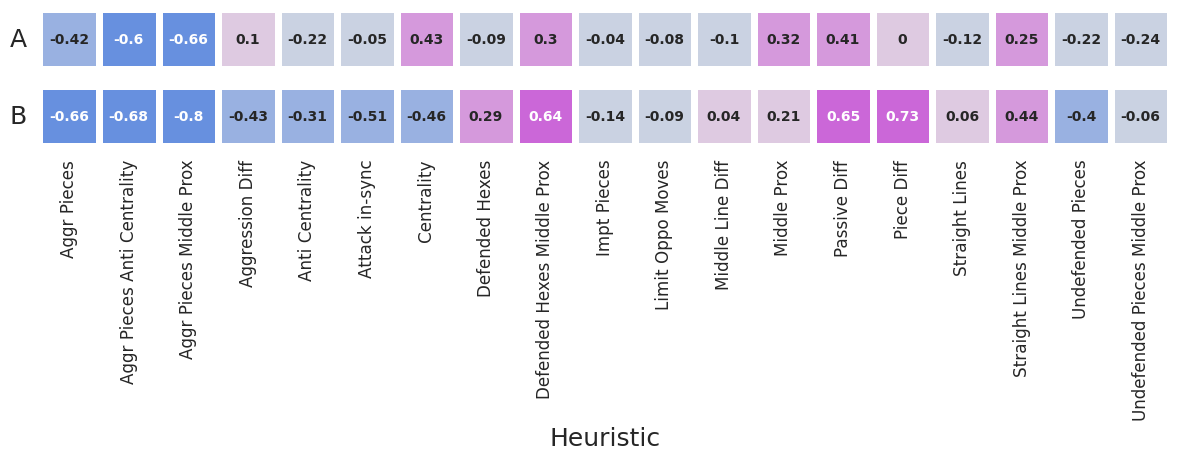

In [88]:
import seaborn as sns 
import matplotlib.pyplot as plt

experiment = "exp2"
DIRECTORY = "../data/heuristic_elo_correlation_data/" + experiment
heuristics_data_path = DIRECTORY + "/Heuristics Elo Data"
heuristic_elo_correlation_path = os.path.join(DIRECTORY, "Correlation_Values.txt")

df_two = pd.read_csv(heuristic_elo_correlation_path)
df_two['Correlation_Value'] = df_two[' Correlation_Value '].round(2)

experiment = "exp3"
DIRECTORY = "../data/heuristic_elo_correlation_data/" + experiment
heuristics_data_path = DIRECTORY + "/Heuristics Elo Data"
heuristic_elo_correlation_path = os.path.join(DIRECTORY, "Correlation_Values.txt")

df_three = pd.read_csv(heuristic_elo_correlation_path)
df_three['Correlation_Value'] = df_three[' Correlation_Value '].round(2)

df_two_heatmap = df_two.pivot_table(index=None, columns='Heuristic', values='Correlation_Value') 
df_three_heatmap = df_three.pivot_table(index=None, columns='Heuristic', values='Correlation_Value') 

colors = ["#6790df", "#e3e3e3", "#cb67d8"]
color_scheme = sns.blend_palette(colors)

min_val = -0.8 
max_val = 0.73

sns.set_context(rc={"axes.labelsize": 18})
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 5.5), sharex=True)

heatmap_two = sns.heatmap(df_two_heatmap, 
  ax=ax1,
  annot=True, 
  cmap=color_scheme, 
  linewidths=5, 
  # robust=True,
  vmin=min_val, 
  vmax=max_val, 
  square=True, 
  cbar=False, 
  yticklabels=False, 
  annot_kws={"fontsize": 10, "fontweight": "bold"}
)
heatmap_two.set(xlabel=None)
heatmap_two.set_ylabel("A", labelpad=15)
ax1.yaxis.label.set(rotation='horizontal', rotation_mode='anchor', horizontalalignment='center', verticalalignment='center')

heatmap_three = sns.heatmap(df_three_heatmap, 
  ax=ax2,
  annot=True, 
  cmap=color_scheme, 
  linewidths=5, 
  # robust=True,
  vmin=min_val, 
  vmax=max_val, 
  square=True, 
  cbar=False, 
  yticklabels=False, 
  annot_kws={"fontsize": 10, "fontweight": "bold"}
)
heatmap_three.set_ylabel("B", labelpad=15)
ax2.yaxis.label.set(rotation='horizontal', rotation_mode='anchor', horizontalalignment='center', verticalalignment='center')
# heatmap_three.tick_params(axis='y', labelrotation=0)



fig.tight_layout()

plt.show()